In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("display.precision", 4)

plt.style.use('dark_background')

# Read and clean data

In [3]:
data_folder = 'C:/Users/Graham West/Python Notebooks/Meharry Teaching/Datasets/'

df = pd.read_csv(data_folder + 'Wine Quality/WineQT.csv')
df = df.reset_index(drop=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# drop Id column
df = df[ df.columns[:-1] ]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [7]:
df.quality.value_counts().sort_index()

quality
5    483
6    462
7    143
Name: count, dtype: int64

In [6]:
df = df[ df.quality.isin([5,6,7]) ]

fixed acidity


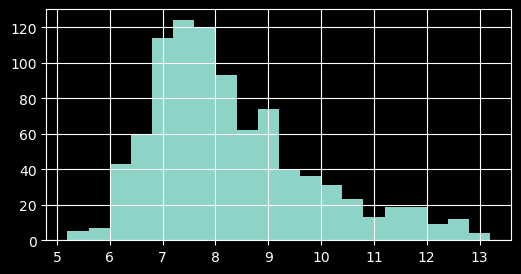

volatile acidity


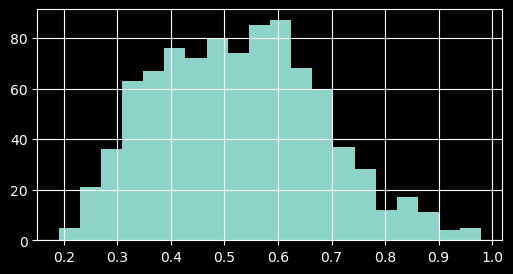

citric acid


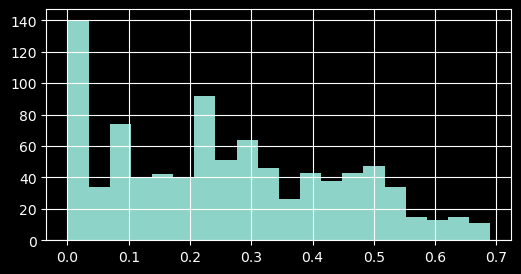

residual sugar


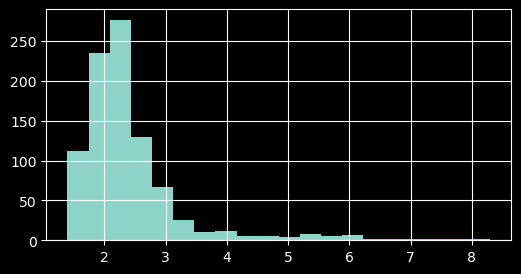

chlorides


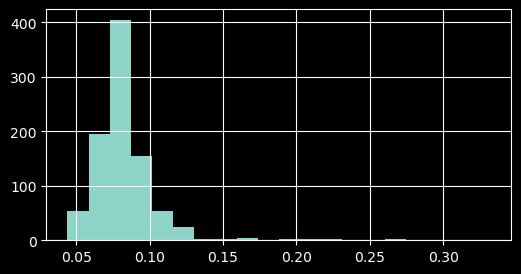

free sulfur dioxide


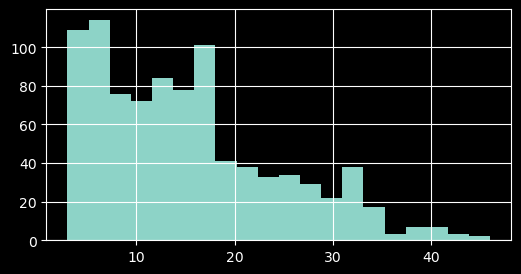

total sulfur dioxide


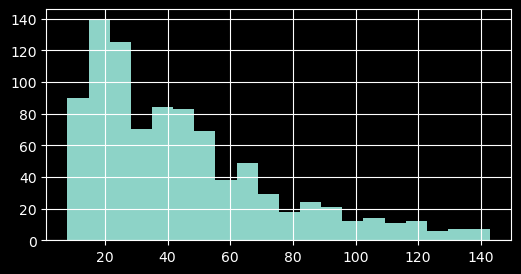

density


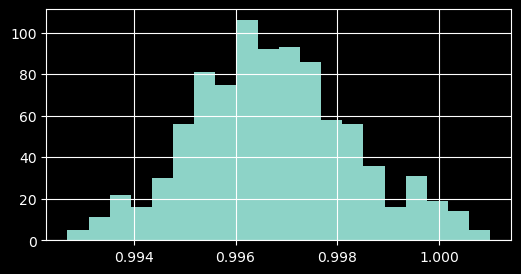

pH


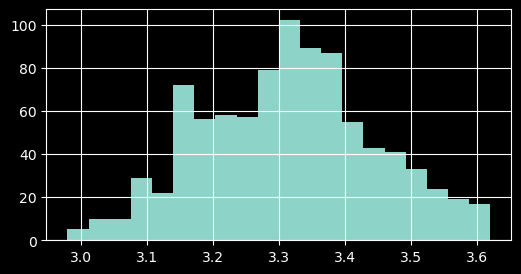

sulphates


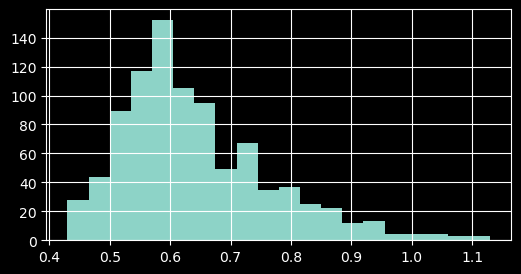

alcohol


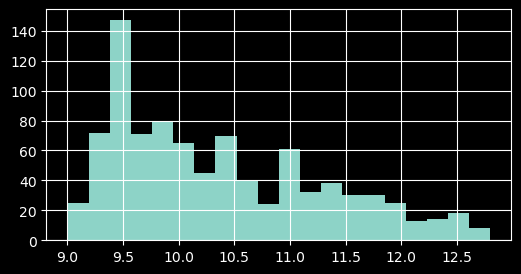

In [10]:
for col in df.columns[:-1]:
    print(col)
    df[col].hist(bins=20, figsize=(6,3));
    plt.show()
# end

# Filter outliers

In [9]:
q = 0.01

for col in df.columns[:-1]:
    print(df.shape)
    a = df[col].quantile(q)
    b = df[col].quantile(1-q)
    df = df[ df[col] >= a ]
    df = df[ df[col] <= b ]
# end
print(df.shape)

(1088, 12)
(1068, 12)
(1046, 12)
(1037, 12)
(1022, 12)
(1000, 12)
(987, 12)
(975, 12)
(956, 12)
(937, 12)
(919, 12)
(908, 12)


# Preprocess

In [11]:
X = df.drop('quality', axis=1)
y = df['quality']

# Scale features

In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

for c in X.columns:
    X[c] = std_scaler.fit_transform(X[[c]])[:,0]
# end

### Label encode so that the classes start at 0

In [13]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y = LE.fit_transform(y)
y

array([0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2,
       2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0,
       2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

### Train/test split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y)

### SMOTE

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(
    sampling_strategy='auto',
    k_neighbors=20,
)

print("Original label distribution: ", Counter(y_train))

X_train, y_train = smote.fit_resample(X_train, y_train)

print("Resampled label distribution:", Counter(y_train))

Original label distribution:  Counter({0: 328, 1: 313, 2: 85})
Resampled label distribution: Counter({1: 328, 0: 328, 2: 328})


# Modeling

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

dropout_rate = 0.1

n_classes = np.unique(y).shape[0]

# Create model
model = Sequential([
    Input(shape=X.shape[1:]),

    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    
    Dense(n_classes, activation='softmax'),
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=100,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 20)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,563 (6.11 KB)

 Trainable params: 1,563 (6.11 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=0,
)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


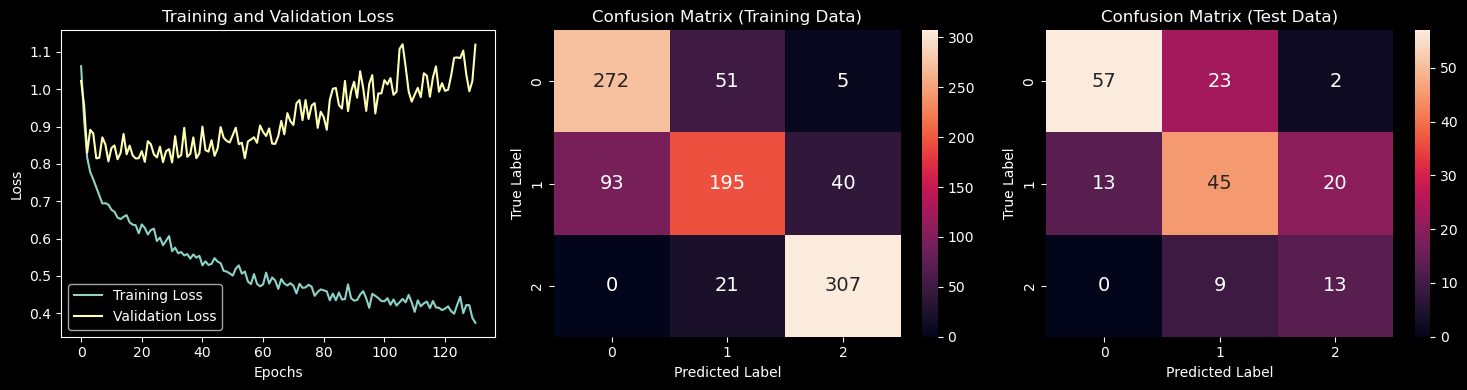

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        82
           1       0.58      0.58      0.58        78
           2       0.37      0.59      0.46        22

    accuracy                           0.63       182
   macro avg       0.59      0.62      0.60       182
weighted avg       0.66      0.63      0.64       182



In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_train_pred = model.predict(X_train).argmax(axis=1)
y_test_pred  = model.predict(X_test).argmax(axis=1)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Middle subplot: Confusion Matrix (Training Data)
sns.heatmap(cm_train, annot=True, fmt='d', ax=axes[1], vmin=0, annot_kws={"size": 14})
axes[1].set_title('Confusion Matrix (Training Data)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Right subplot: Confusion Matrix (Test Data)
sns.heatmap(cm_test, annot=True, fmt='d', ax=axes[2], vmin=0, annot_kws={"size": 14})
axes[2].set_title('Confusion Matrix (Test Data)')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Print classification report for test data
report = classification_report(y_test, y_test_pred)
print(report)

# Compare w/ other models

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=1,   weights='uniform'),
    KNeighborsClassifier(n_neighbors=5,   weights='uniform'),
    KNeighborsClassifier(n_neighbors=10,  weights='uniform'),
    KNeighborsClassifier(n_neighbors=50,  weights='uniform'),
    RandomForestClassifier(n_estimators=10,  max_leaf_nodes=3),
    RandomForestClassifier(n_estimators=10,  max_leaf_nodes=10),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=3),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=10),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=30),
    GradientBoostingClassifier(n_estimators=10,  learning_rate=0.1, max_leaf_nodes=3),
    GradientBoostingClassifier(n_estimators=10,  learning_rate=0.1, max_leaf_nodes=10),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_leaf_nodes=3),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_leaf_nodes=10),
]

LogisticRegression()
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        82
           1       0.58      0.47      0.52        78
           2       0.38      0.82      0.51        22

    accuracy                           0.60       182
   macro avg       0.58      0.65      0.59       182
weighted avg       0.65      0.60      0.61       182



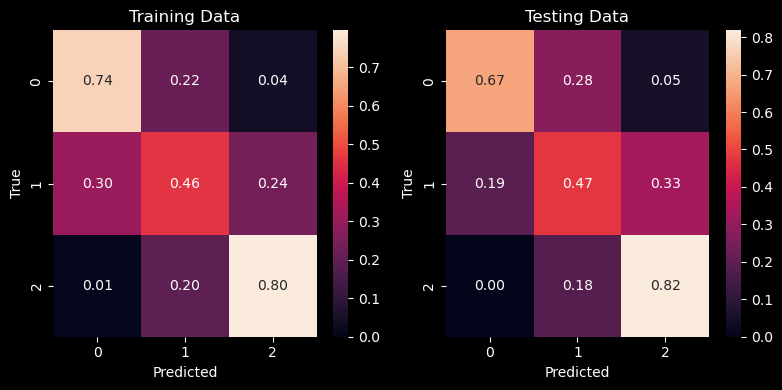

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        82
           1       0.60      0.59      0.59        78
           2       0.39      0.64      0.48        22

    accuracy                           0.62       182
   macro avg       0.58      0.62      0.59       182
weighted avg       0.65      0.62      0.63       182



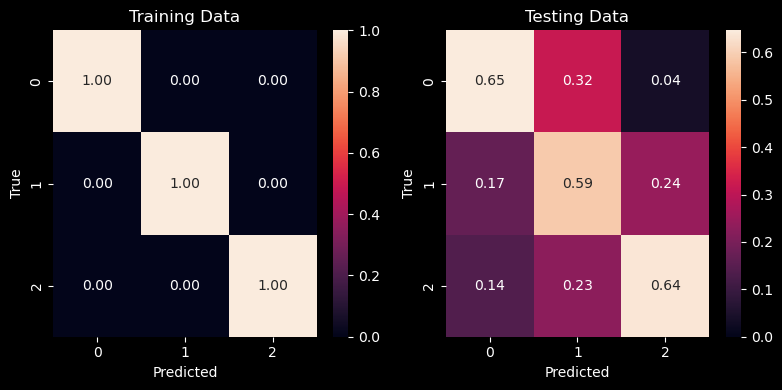

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.83      0.60      0.70        82
           1       0.53      0.54      0.54        78
           2       0.32      0.64      0.42        22

    accuracy                           0.58       182
   macro avg       0.56      0.59      0.55       182
weighted avg       0.64      0.58      0.59       182



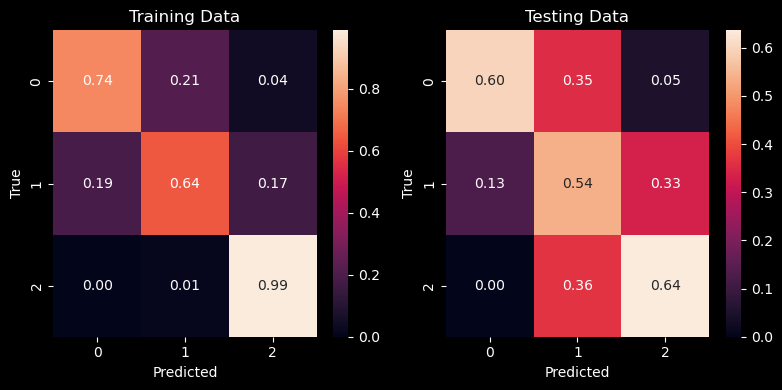

KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        82
           1       0.53      0.47      0.50        78
           2       0.31      0.68      0.42        22

    accuracy                           0.57       182
   macro avg       0.55      0.60      0.55       182
weighted avg       0.64      0.57      0.59       182



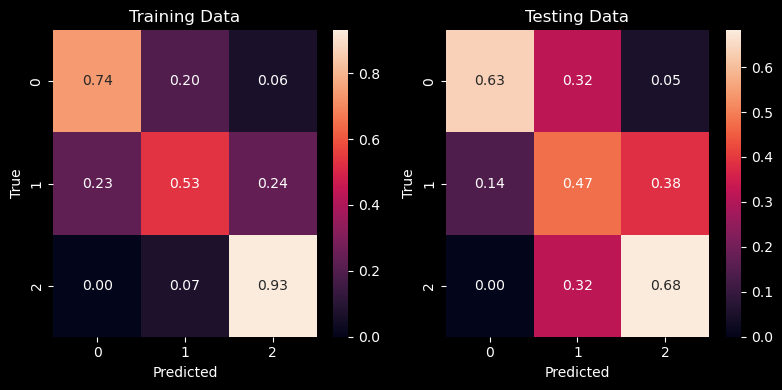

KNeighborsClassifier(n_neighbors=50)
              precision    recall  f1-score   support

           0       0.82      0.65      0.72        82
           1       0.53      0.42      0.47        78
           2       0.27      0.68      0.39        22

    accuracy                           0.55       182
   macro avg       0.54      0.58      0.53       182
weighted avg       0.63      0.55      0.57       182



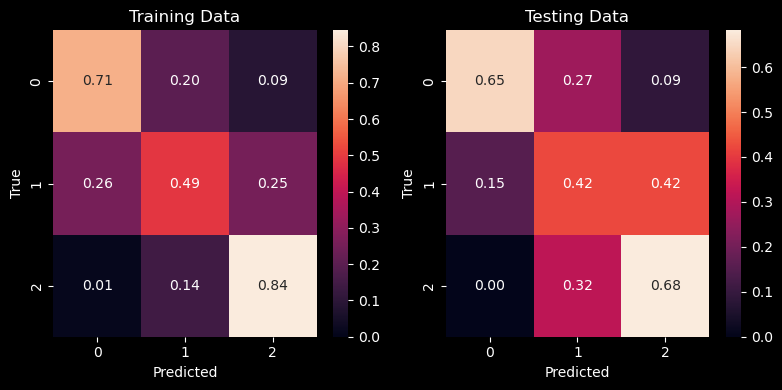

RandomForestClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        82
           1       0.64      0.29      0.40        78
           2       0.26      0.64      0.37        22

    accuracy                           0.57       182
   macro avg       0.54      0.58      0.51       182
weighted avg       0.63      0.57      0.56       182



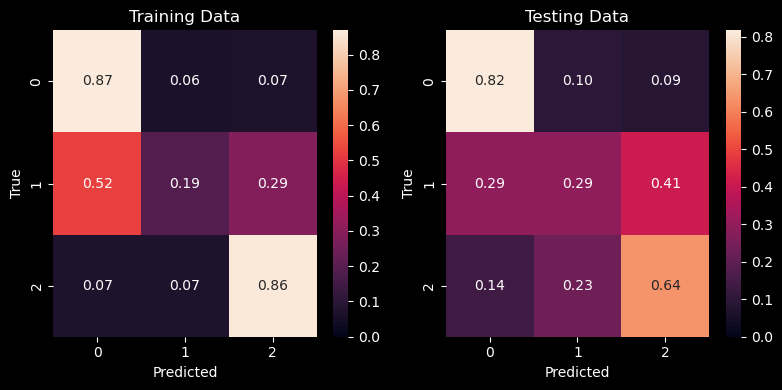

RandomForestClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        82
           1       0.57      0.49      0.52        78
           2       0.35      0.64      0.45        22

    accuracy                           0.60       182
   macro avg       0.56      0.61      0.57       182
weighted avg       0.63      0.60      0.61       182



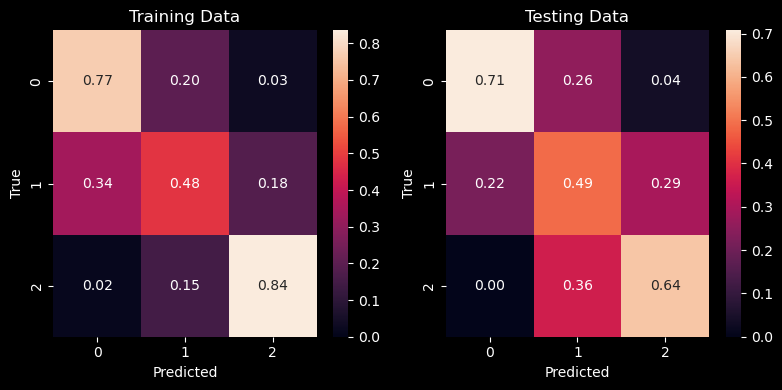

RandomForestClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        82
           1       0.68      0.35      0.46        78
           2       0.31      0.77      0.45        22

    accuracy                           0.60       182
   macro avg       0.58      0.64      0.56       182
weighted avg       0.67      0.60      0.60       182



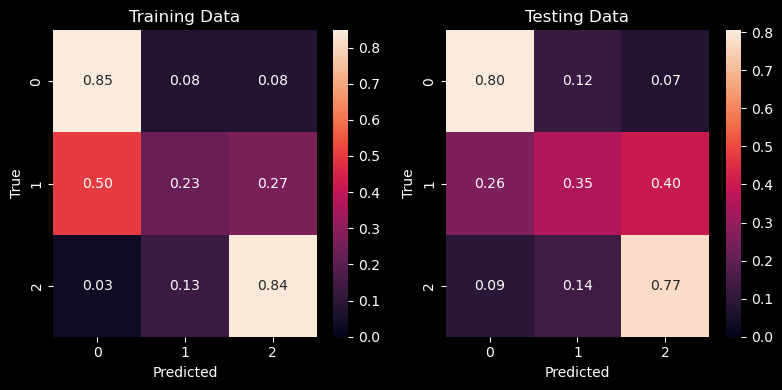

RandomForestClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        82
           1       0.60      0.51      0.55        78
           2       0.33      0.59      0.42        22

    accuracy                           0.62       182
   macro avg       0.57      0.61      0.58       182
weighted avg       0.66      0.62      0.63       182



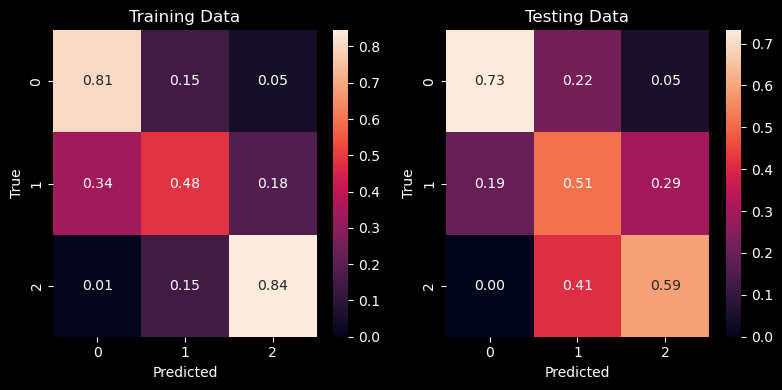

RandomForestClassifier(max_leaf_nodes=30)
              precision    recall  f1-score   support

           0       0.85      0.73      0.78        82
           1       0.62      0.58      0.60        78
           2       0.36      0.64      0.46        22

    accuracy                           0.65       182
   macro avg       0.61      0.65      0.61       182
weighted avg       0.69      0.65      0.67       182



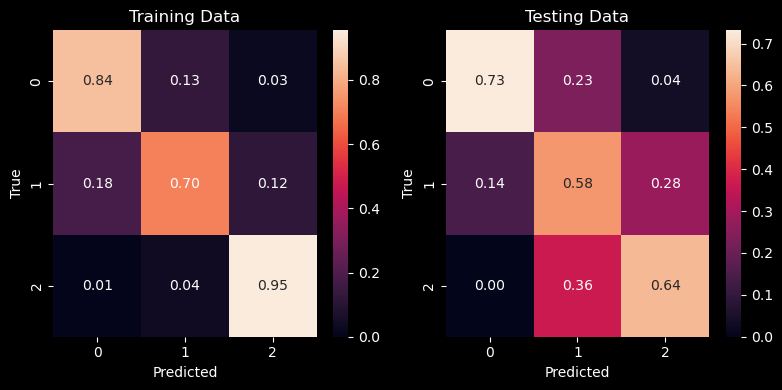

GradientBoostingClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        82
           1       0.56      0.49      0.52        78
           2       0.32      0.59      0.41        22

    accuracy                           0.60       182
   macro avg       0.56      0.60      0.56       182
weighted avg       0.64      0.60      0.61       182



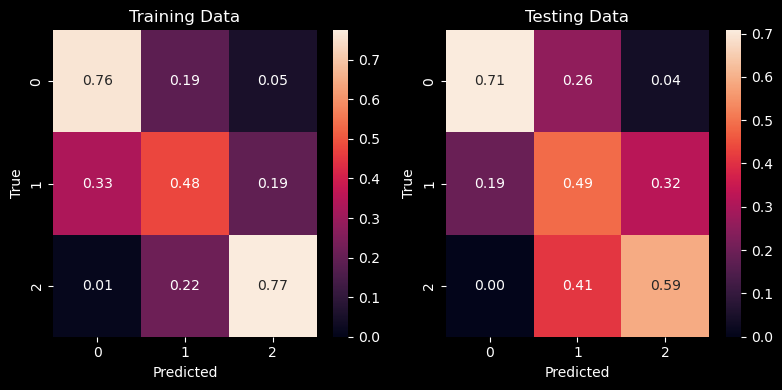

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        82
           1       0.61      0.47      0.53        78
           2       0.29      0.55      0.38        22

    accuracy                           0.62       182
   macro avg       0.56      0.60      0.56       182
weighted avg       0.65      0.62      0.62       182



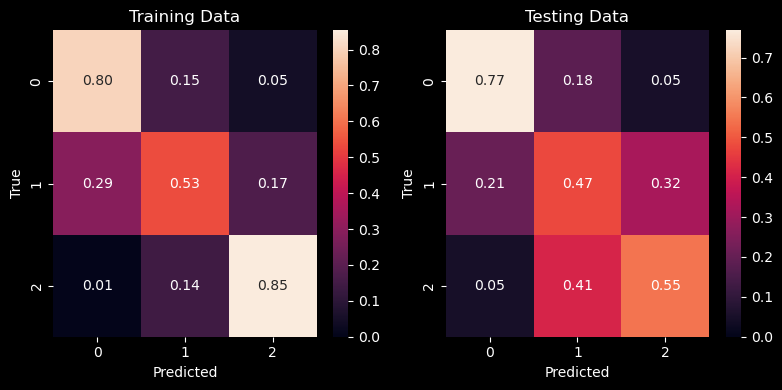

GradientBoostingClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.83      0.70      0.75        82
           1       0.60      0.58      0.59        78
           2       0.39      0.68      0.50        22

    accuracy                           0.64       182
   macro avg       0.61      0.65      0.61       182
weighted avg       0.68      0.64      0.65       182



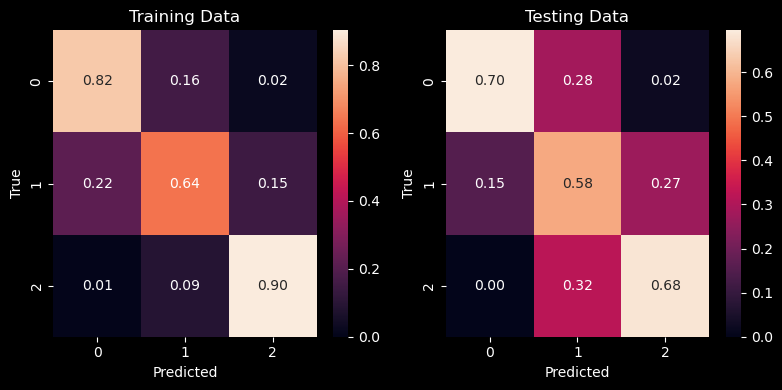

GradientBoostingClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        82
           1       0.62      0.65      0.64        78
           2       0.42      0.59      0.49        22

    accuracy                           0.67       182
   macro avg       0.63      0.65      0.63       182
weighted avg       0.70      0.67      0.68       182



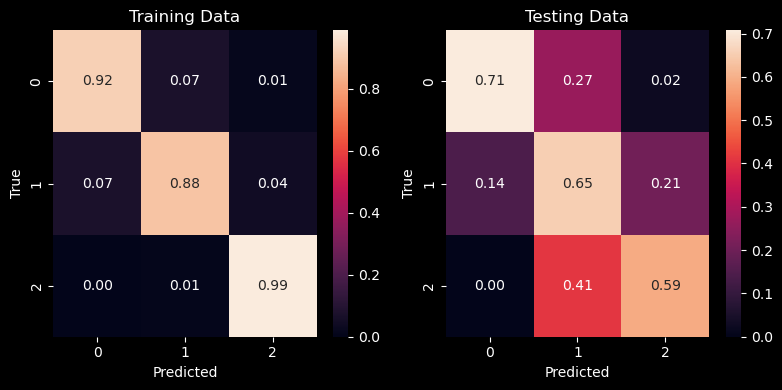

In [23]:
for m in models:
    # Train the model
    m.fit(X_train, y_train)
    
    print(m)

    # Generate predictions
    y_train_pred = m.predict(X_train).astype(int)
    y_test_pred = m.predict(X_test).astype(int)

    # Print classification report
    print(classification_report(y_test, y_test_pred))

    # Compute confusion matrices
    conf_matrix_train = confusion_matrix(y_train, y_train_pred).astype(float)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred).astype(float)

    # Normalize confusion matrices
    for i in range(conf_matrix_train.shape[0]):
        conf_matrix_train[i, :] /= conf_matrix_train[i, :].sum()
        conf_matrix_test[i, :] /= conf_matrix_test[i, :].sum()

    # Create subplots for confusion matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

    # Plot confusion matrix for training data
    sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='.2f', ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Training Data")

    # Plot confusion matrix for test data
    sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='.2f', ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")
    axes[1].set_title("Testing Data")

    # Show the plots
    plt.tight_layout()
    plt.show()
# end

# CV with Keras

In [24]:
import tensorflow as tf

splits = 10

dropout_rate = 0.1
n_classes = np.unique(y).shape[0]

learning_rate = 0.01

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=100,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

for i in range(splits):
    tf.keras.backend.clear_session()
    
    print(i)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        stratify=y)
    smote = SMOTE(
        sampling_strategy='auto',
        k_neighbors=20,
    )
    
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Build model
    model = Sequential([
        Input(shape=X.shape[1]),
    
        Dense(20, activation='relu'),
        #BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(20, activation='relu'),
        #BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(20, activation='relu'),
        #BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(20, activation='relu'),
        
        Dense(n_classes, activation='softmax'),
    ])

    # Define the optimizer with a custom learning rate
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=1000,
        batch_size=256,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=0,
    )

    # Results
    
    # Get predictions
    y_train_pred = model.predict(X_train).argmax(axis=1)
    y_test_pred  = model.predict(X_test).argmax(axis=1)
    
    # Compute confusion matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    
    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Left subplot: Training and Validation Loss
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    
    # Middle subplot: Confusion Matrix (Training Data)
    sns.heatmap(cm_train, annot=True, fmt='d', ax=axes[1], vmin=0, annot_kws={"size": 14}, cmap='nipy_spectral')
    axes[1].set_title('Confusion Matrix (Training Data)')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')
    
    # Right subplot: Confusion Matrix (Test Data)
    sns.heatmap(cm_test, annot=True, fmt='d', ax=axes[2], vmin=0, annot_kws={"size": 14}, cmap='nipy_spectral')
    axes[2].set_title('Confusion Matrix (Test Data)')
    axes[2].set_xlabel('Predicted Label')
    axes[2].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()
    
    # Print classification report for test data
    report = classification_report(y_test, y_test_pred)
    print(report)
# END


0


ValueError: Cannot convert '11' to a shape.

# Custom ordinal loss function

In [25]:
import tensorflow as tf

def OrdinalLoss(y_true, y_pred):
    # Cast y_true to float32 to match y_pred's type
    y_true = tf.cast(y_true, tf.float32)
    
    y_pred = tf.clip_by_value(y_pred, 1e-15, 1 - 1e-15)
    
    cum_true = tf.cumsum(y_true, axis=-1)
    cum_pred = tf.cumsum(y_pred, axis=-1)
    
    loss = tf.reduce_sum((cum_true - cum_pred) ** 2, axis=-1)
    
    return loss
# end

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

dropout_rate = 0.1

n_classes = np.unique(y).shape[0]

# Create model
model = Sequential([
    Input(shape=X.shape[1:]),

    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    
    Dense(n_classes, activation='softmax'),
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model
model.compile(
    optimizer=optimizer,
    loss=OrdinalLoss,
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=100,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,563 (6.11 KB)

 Trainable params: 1,563 (6.11 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=0,
)

InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/compile_loss/ordinal_loss/sub/BroadcastGradientArgs defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\Graham West\anaconda3\Lib\asyncio\windows_events.py", line 322, in run_forever

  File "C:\Users\Graham West\anaconda3\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\Graham West\anaconda3\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\Users\Graham West\anaconda3\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Graham West\AppData\Local\Temp\ipykernel_27904\2649881721.py", line 2, in <module>

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 377, in fit

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 220, in function

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 133, in multi_step_on_iterator

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 114, in one_step_on_data

  File "C:\Users\Graham West\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 78, in train_step

Incompatible shapes: [256] vs. [256,3]
	 [[{{node gradient_tape/compile_loss/ordinal_loss/sub/BroadcastGradientArgs}}]] [Op:__inference_multi_step_on_iterator_11900]

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


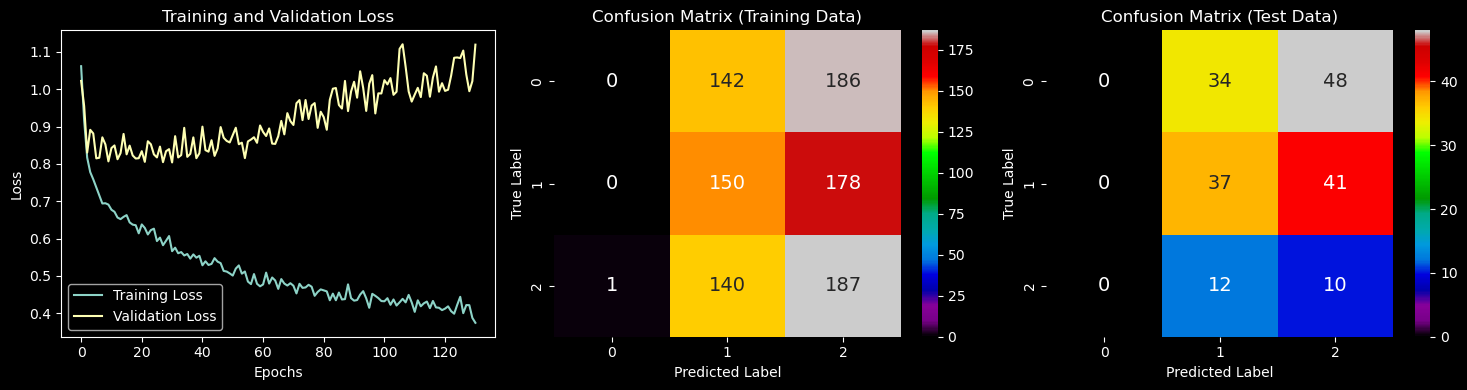

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.45      0.47      0.46        78
           2       0.10      0.45      0.17        22

    accuracy                           0.26       182
   macro avg       0.18      0.31      0.21       182
weighted avg       0.20      0.26      0.22       182



In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_train_pred = model.predict(X_train).argmax(axis=1)
y_test_pred  = model.predict(X_test).argmax(axis=1)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Middle subplot: Confusion Matrix (Training Data)
sns.heatmap(cm_train, annot=True, fmt='d', ax=axes[1], vmin=0, annot_kws={"size": 14}, cmap='nipy_spectral')
axes[1].set_title('Confusion Matrix (Training Data)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Right subplot: Confusion Matrix (Test Data)
sns.heatmap(cm_test, annot=True, fmt='d', ax=axes[2], vmin=0, annot_kws={"size": 14}, cmap='nipy_spectral')
axes[2].set_title('Confusion Matrix (Test Data)')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Print classification report for test data
report = classification_report(y_test, y_test_pred)
print(report)